<a href="https://colab.research.google.com/github/FilippMakarov/chekFM/blob/main/AT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_excel("Nasdaq.xlsx")
data


,Unnamed: 0,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry,Z
0,871,BAM,Brookfield Asset Management Inc. Common Stock,$45.52,-1.670,-3.539%,74720277027,Canada,1925,1563431,Consumer Discretionary,Other Consumer Services,BAM
1,2048,CVR,Chicago Rivet & Machine Co. Common Stock,$28.47,-0.020,-0.07%,27505778,United States,1930,882,Consumer Discretionary,Industrial Specialties,CVR
2,4491,LGL,LGL Group Inc. (The) Common Stock,$11.435,-0.065,-0.565%,61296974,United States,1946,1509,Technology,Industrial Machinery/Components,LGL
3,1526,CET,Central Securities Corporation Common Stock,$35.75,-0.520,-1.434%,974773228,United States,1951,15250,Finance,Finance/Investors Services,CET
4,5166,NBR,Nabors Industries Ltd.,$161.03,-12.920,-7.427%,1515601156,Bermuda,1951,82194,Energy,Oil & Gas Production,NBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,8254,XPDB,Power & Digital Infrastructure Acquisition II ...,$9.81,0.010,0.102%,352546875,United States,2022,243,Industrials,Consumer Electronics/Appliances,XPDB
3901,8256,XPDBW,Power & Digital Infrastructure Acquisition II ...,$0.24,-0.015,-5.882%,0,United States,2022,8100,Industrials,Consumer Electronics/Appliances,XPDBW
3902,8264,XPON,Expion360 Inc. Common Stock,$2.97,-0.230,-7.188%,20167963,United States,2022,70206,Technology,Electronic Components,XPON
3903,8322,ZING,FTAC Zeus Acquisition Corp. Class A Common Stock,$9.88,0.000,0.00%,553658730,United States,2022,506,Industrials,Consumer Electronics/Appliances,ZING


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3905 entries, 0 to 3904
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3905 non-null   int64  
 1   Symbol      3905 non-null   object 
 2   Name        3905 non-null   object 
 3   Last Sale   3905 non-null   object 
 4   Net Change  3905 non-null   float64
 5   % Change    3905 non-null   object 
 6   Market Cap  3905 non-null   int64  
 7   Country     3905 non-null   object 
 8   IPO Year    3905 non-null   int64  
 9   Volume      3905 non-null   int64  
 10  Sector      3905 non-null   object 
 11  Industry    3905 non-null   object 
 12  Z           3905 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 396.7+ KB


пропусков нет

In [7]:
data.describe()

,Unnamed: 0,Net Change,Market Cap,IPO Year,Volume
count,3905.000000,3905.000000,3.905000e+03,3905.000000,3.905000e+03
mean,4170.461460,-0.991582,5.754744e+09,2013.071703,5.780370e+05
std,2377.129162,4.169152,6.353889e+10,10.522540,2.639760e+06
min,0.000000,-170.985000,0.000000e+00,1925.000000,1.000000e+00
25%,2191.000000,-0.730000,3.427910e+07,2007.000000,9.897000e+03
50%,4181.000000,-0.170000,2.704117e+08,2018.000000,7.495700e+04
75%,6236.000000,-0.010000,1.165274e+09,2021.000000,3.249490e+05
max,8356.000000,7.380000,2.330135e+12,2022.000000,6.188427e+07


In [8]:
data.columns = data.columns.str.replace(" ","_") # преобразовал названия

In [9]:
# преобразовал значения столбца Last_Sale в численные
def convert_to_float(Last_Sale):
    return float(Last_Sale[1:])
data['Last_Sale'] = data['Last_Sale'].apply(convert_to_float)


In [10]:
data.columns = data.columns.str.replace("%_","percent_") # преобразовал название

In [11]:
# преобразовал значения столбца percent_Change в численные
def convert_to_float(percent_Change):
    return float(percent_Change[:-1])
data['percent_Change'] = data['percent_Change'].apply(convert_to_float)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3905 entries, 0 to 3904
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed:_0      3905 non-null   int64  
 1   Symbol          3905 non-null   object 
 2   Name            3905 non-null   object 
 3   Last_Sale       3905 non-null   float64
 4   Net_Change      3905 non-null   float64
 5   percent_Change  3905 non-null   float64
 6   Market_Cap      3905 non-null   int64  
 7   Country         3905 non-null   object 
 8   IPO_Year        3905 non-null   int64  
 9   Volume          3905 non-null   int64  
 10  Sector          3905 non-null   object 
 11  Industry        3905 non-null   object 
 12  Z               3905 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 396.7+ KB


In [13]:
data.describe()

,Unnamed:_0,Last_Sale,Net_Change,percent_Change,Market_Cap,IPO_Year,Volume
count,3905.000000,3905.000000,3905.000000,3905.000000,3.905000e+03,3905.000000,3.905000e+03
mean,4170.461460,28.746933,-0.991582,-3.269931,5.754744e+09,2013.071703,5.780370e+05
std,2377.129162,122.702568,4.169152,8.217508,6.353889e+10,10.522540,2.639760e+06
min,0.000000,0.003900,-170.985000,-94.421000,0.000000e+00,1925.000000,1.000000e+00
25%,2191.000000,2.630000,-0.730000,-5.764000,3.427910e+07,2007.000000,9.897000e+03
50%,4181.000000,9.855000,-0.170000,-3.046000,2.704117e+08,2018.000000,7.495700e+04
75%,6236.000000,20.610000,-0.010000,-0.159000,1.165274e+09,2021.000000,3.249490e+05
max,8356.000000,4127.900000,7.380000,272.277000,2.330135e+12,2022.000000,6.188427e+07


убрать аномалии

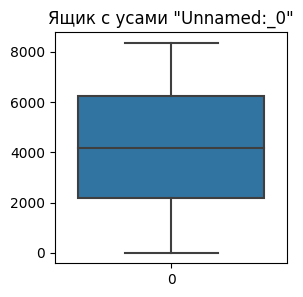

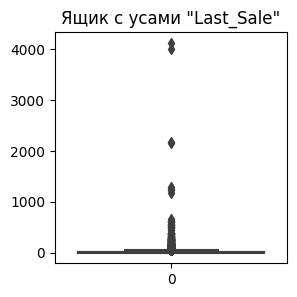

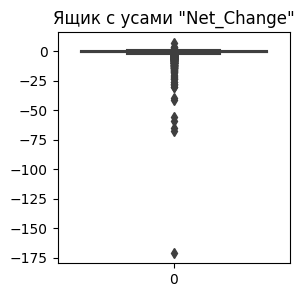

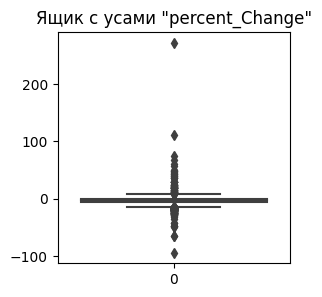

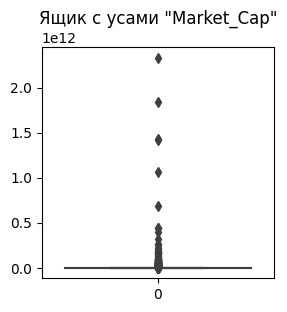

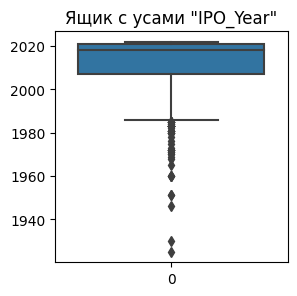

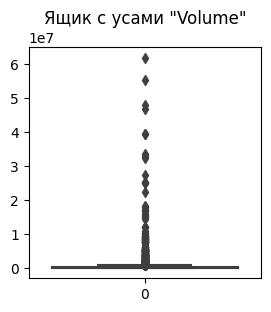

In [14]:
numeric_features=[x for x in data.columns if data[x].dtype!="object"]


for i in data[numeric_features].columns:
    plt.figure(figsize=(3,3))
    plt.title(f'Ящик с усами "{i}"')
    sns.boxplot(data=data[i])

Отбросим из проверки на выбросы столбцец Unnamed:_0, и IPO_Year (скорее всего может быть такое что какая то компания вышла на ipo в 1925, а также рыночную капитализацию компаний Market_Cap Остальные нужно проверить

9.800      27
9.820      25
9.850      24
9.840      21
9.810      21
           ..
5.200       1
190.980     1
12.595      1
82.310      1
2.970       1
Name: Last_Sale, Length: 2869, dtype: int64

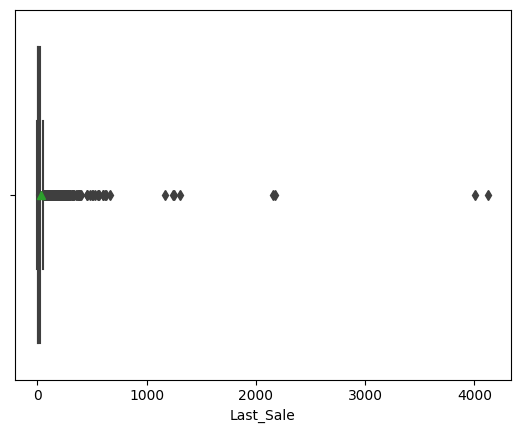

In [15]:
sns.boxplot(data = data, x = "Last_Sale", showmeans=True)
data.Last_Sale.value_counts()

In [16]:
len(data[data.Last_Sale < 0.1])

62

Несмотря на то что, всего 62 компании выходиил на ipo со стоимостью меньше 0.1 доллара, не будем считать это за выброс. Аналогично с стоимостью компаний выше 4000 долларов

 0.0000     393
-0.0100      69
-0.0200      47
 0.0100      47
-0.0400      44
           ... 
-0.4036       1
-3.6500       1
-1.9322       1
-23.4046      1
-0.3517       1
Name: Net_Change, Length: 1416, dtype: int64

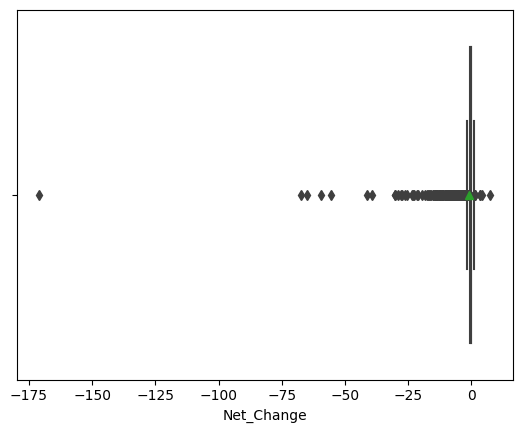

In [17]:
sns.boxplot(data = data, x = "Net_Change", showmeans=True)
data.Net_Change.value_counts()

In [18]:
len(data[data.Net_Change < -10])

57

<Axes: xlabel='Net_Change'>

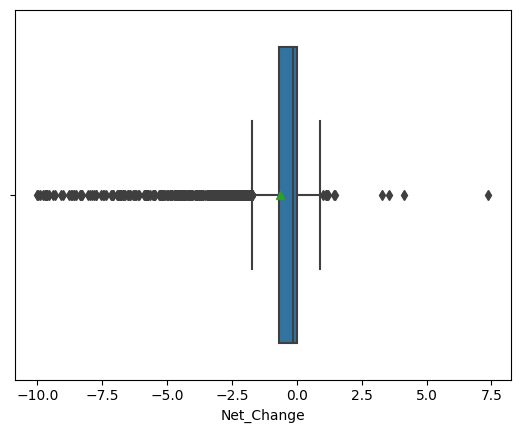

In [19]:
data = data[data.Net_Change > -10]
sns.boxplot(data = data, x = "Net_Change", showmeans=True)


In [20]:
len(data[data.Net_Change > 1])

11

<Axes: xlabel='Net_Change'>

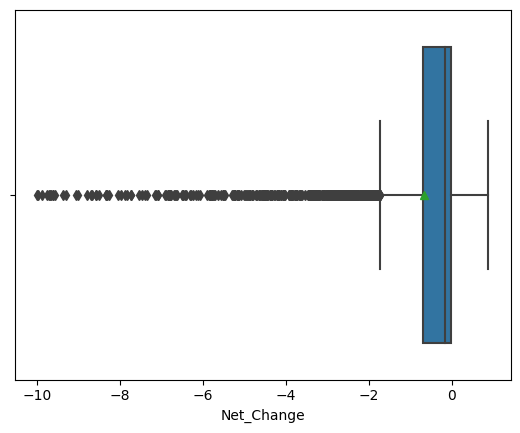

In [21]:
data = data[data.Net_Change < 1]
sns.boxplot(data = data, x = "Net_Change", showmeans=True)

 0.000    393
-0.102     26
 0.102     17
-0.101     16
 0.100     15
         ... 
-1.583      1
-2.326      1
-4.432      1
-2.663      1
 3.030      1
Name: percent_Change, Length: 2831, dtype: int64

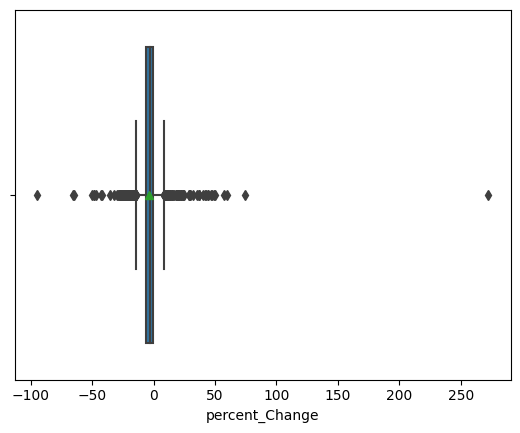

In [22]:
sns.boxplot(data = data, x = "percent_Change", showmeans=True)
data.percent_Change.value_counts()

In [23]:
len(data[data.percent_Change > 30])

18

<Axes: xlabel='percent_Change'>

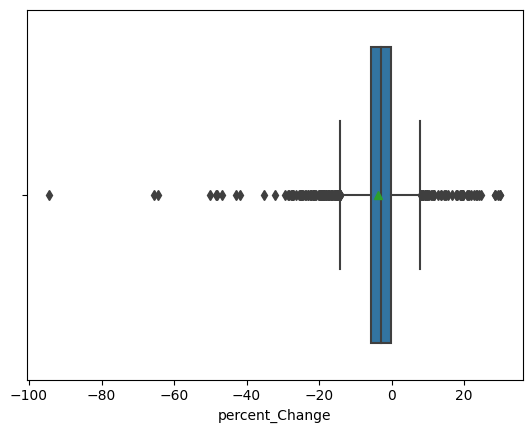

In [24]:
data = data[data.percent_Change < 30]
sns.boxplot(data = data, x = "percent_Change", showmeans=True)

In [25]:
len(data[data.percent_Change < -25])

23

<Axes: xlabel='percent_Change'>

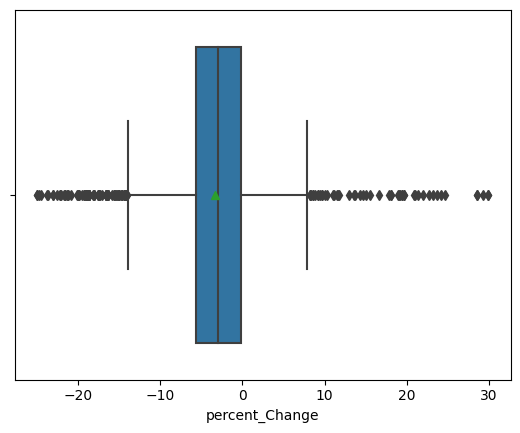

In [26]:
data = data[data.percent_Change > -25]
sns.boxplot(data = data, x = "percent_Change", showmeans=True)

1          39
100        35
2          23
300        13
200        12
           ..
37652       1
1109336     1
118050      1
204152      1
27500       1
Name: Volume, Length: 3482, dtype: int64

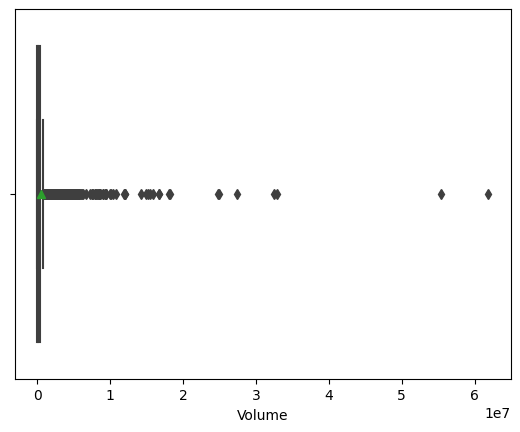

In [27]:
sns.boxplot(data = data, x = "Volume", showmeans=True)
data.Volume.value_counts()


судя по количеству всттречающихся значений, нет явно выраженных значений которые чаще всего встерчаются. Выборку нужно оставить полную.

In [28]:
data.describe() # В результате обработки данных,  убрали выбросы по столбцам Net_Change и percent_Change

,Unnamed:_0,Last_Sale,Net_Change,percent_Change,Market_Cap,IPO_Year,Volume
count,3793.000000,3793.000000,3793.000000,3793.000000,3.793000e+03,3793.000000,3.793000e+03
mean,4174.755602,20.790418,-0.680098,-3.382697,4.412967e+09,2013.175587,5.077974e+05
std,2378.978996,38.320189,1.348452,4.731311,5.389578e+10,10.406950,2.129371e+06
min,0.000000,0.030100,-9.995000,-24.975000,0.000000e+00,1925.000000,1.000000e+00
25%,2194.000000,2.730000,-0.703300,-5.703000,3.554880e+07,2007.000000,9.897000e+03
50%,4184.000000,9.850000,-0.170000,-2.987000,2.683425e+08,2018.000000,7.373700e+04
75%,6237.000000,19.580000,-0.010000,-0.160000,1.115161e+09,2021.000000,3.182790e+05
max,8356.000000,602.300000,0.880000,29.950000,2.330135e+12,2022.000000,6.188427e+07


**2. Выбрать случайным образом компанию из списка Nasdaq:np.random.seed(0)np.random.randint(1, len(nasdaq))
Определить год IPO, страну, сектор и индустрию.**

ipo страну индустрию просто посмотреть в таблице

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3793 entries, 0 to 3904
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed:_0      3793 non-null   int64  
 1   Symbol          3793 non-null   object 
 2   Name            3793 non-null   object 
 3   Last_Sale       3793 non-null   float64
 4   Net_Change      3793 non-null   float64
 5   percent_Change  3793 non-null   float64
 6   Market_Cap      3793 non-null   int64  
 7   Country         3793 non-null   object 
 8   IPO_Year        3793 non-null   int64  
 9   Volume          3793 non-null   int64  
 10  Sector          3793 non-null   object 
 11  Industry        3793 non-null   object 
 12  Z               3793 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 414.9+ KB


In [30]:
np.random.seed(0)
np.random.randint(1, len(data['Name']))

2733

In [31]:
#some_list = [2733]
#df = data[data.index.isin (some_list)]
#df

In [32]:
data.loc[[2733], ['Symbol','IPO_Year', 'Name', 'Sector','Industry']]

,Symbol,IPO_Year,Name,Sector,Industry
2733,AFACW,2021,Arena Fortify Acquisition Corp. Warrant,Miscellaneous,Other Pharmaceuticals


**3. Оценить степень связи между двумя категориальными переменными: страной и индустрией. для всех компаний**

H0 проверка по критерию Пирсона - нет ли статистических значимой разницы между категориальными переменными столбцом страна и индустрия ('Country' 'Industry') ?


In [33]:
from scipy.stats import chi2_contingency

создадим таблицу сопряженностей

In [34]:
contingency_table = pd.crosstab(data["Country"],data["Industry"])
contingency_table

Industry,Accident &Health Insurance,Advertising,Aerospace,Agricultural Chemicals,Air Freight/Delivery Services,Aluminum,Apparel,Assisted Living Services,Auto & Home Supply Stores,Auto Manufacturing,...,Specialty Insurers,Steel/Iron Ore,Telecommunications Equipment,Tobacco,Transportation Services,Trucking Freight/Courier Services,Trusts Except Educational Religious and Charitable,Water Sewer Pipeline Comm & Power Line Construction,Water Supply,Wholesale Distributors
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Australia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bermuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brazil,0,0,1,0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
Canada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cayman Islands,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Chile,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
China,0,2,0,0,3,1,1,0,0,3,...,3,1,1,0,1,0,0,0,0,0


In [35]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=14129.908955559125, pvalue=0.0, dof=6435, expected_freq=array([[3.95465331e-03, 3.95465331e-02, 1.97732665e-02, ...,
        5.27287108e-03, 6.59108885e-03, 7.90930662e-03],
       [3.16372265e-03, 3.16372265e-02, 1.58186132e-02, ...,
        4.21829686e-03, 5.27287108e-03, 6.32744529e-03],
       [2.37279199e-03, 2.37279199e-02, 1.18639599e-02, ...,
        3.16372265e-03, 3.95465331e-03, 4.74558397e-03],
       ...,
       [7.90930662e-04, 7.90930662e-03, 3.95465331e-03, ...,
        1.05457422e-03, 1.31821777e-03, 1.58186132e-03],
       [3.16372265e-02, 3.16372265e-01, 1.58186132e-01, ...,
        4.21829686e-02, 5.27287108e-02, 6.32744529e-02],
       [2.59662536e+00, 2.59662536e+01, 1.29831268e+01, ...,
        3.46216715e+00, 4.32770894e+00, 5.19325073e+00]]))

в результате Pvalue оказался меньше 0,05 (5%), нулевую гепотезу можно отвергнуть, то есть связь между страной и индустрией все таки имеется

**4. Рассмотреть, как распределены доли рыночной стоимости компаний из этого сектора. Сравнить с распределениями всех остальных секторов.**


<Axes: xlabel='Market_Cap', ylabel='Density'>

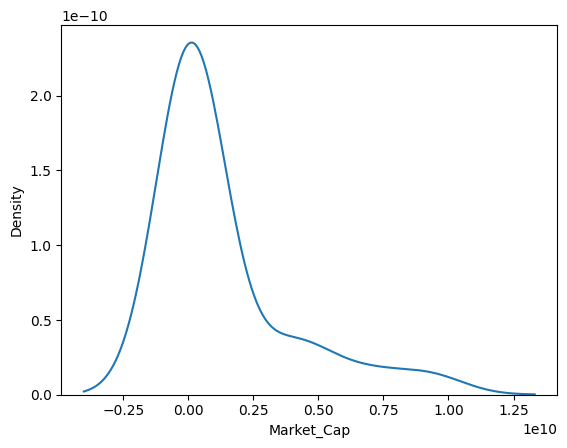

In [36]:
Miscellaneous_Market_Cap = data.Market_Cap[data["Sector"]=="Miscellaneous"]
sns.kdeplot(Miscellaneous_Market_Cap)

Проверим на номралньость распределения рыночную стоимость сектора Miscellaneous

In [37]:
from scipy.stats import shapiro

In [38]:
shapiro(Miscellaneous_Market_Cap)

ShapiroResult(statistic=0.5750850439071655, pvalue=3.295080546195095e-07)

По тесту Шапиро-Уилка pvalue сильно меньше 5% , значит распредление нельзя считать нормальным.

In [39]:
from scipy.stats import kstest

In [40]:
kstest(Miscellaneous_Market_Cap, "norm")

KstestResult(statistic=0.8333333333333334, pvalue=4.906115377843993e-19, statistic_location=4025311, statistic_sign=-1)

По тесту Колмогорова смирнова pvalue сильно меньше 5% , значит распредление нельзя считать нормальным.
Таким образом, по результатам проведения 2 тестов, выясснили что распредление рыночной стоимости в секторе Miscellaneous нельзя считать нормальным

In [41]:
data.Sector.unique()

array(['Consumer Discretionary', 'Technology', 'Finance', 'Energy',
       'Industrials', 'Utilities', 'Health Care', 'Miscellaneous',
       'Consumer Staples', 'Real Estate', 'Basic Materials',
       'Telecommunications'], dtype=object)

Сравним распределение Miscellaneous с распределениями всех остальных секторов, если Pv > 0.05 тогда между выборками нет статистически значимых отличий и средние значения совпадают

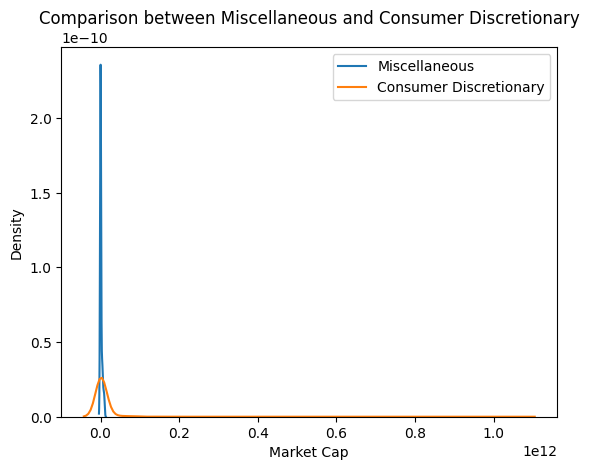

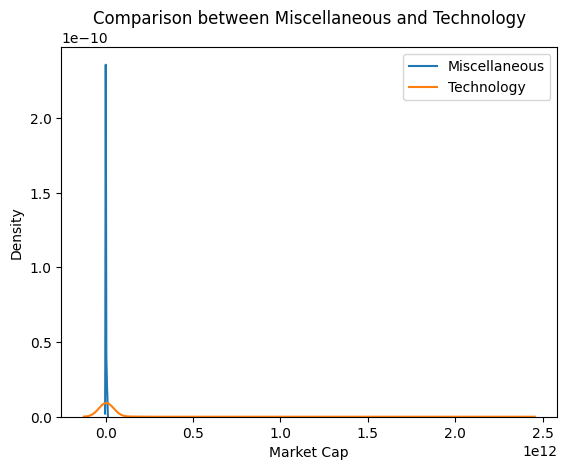

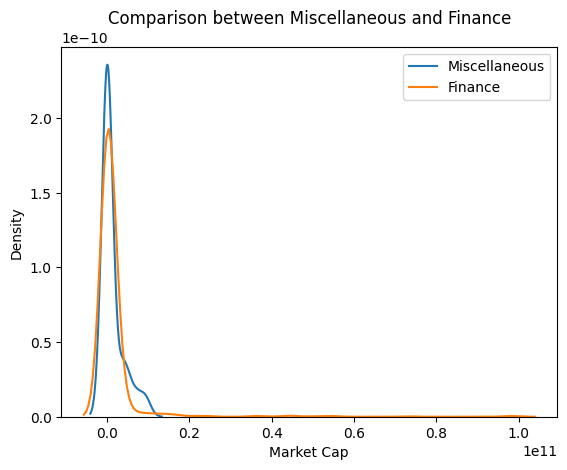

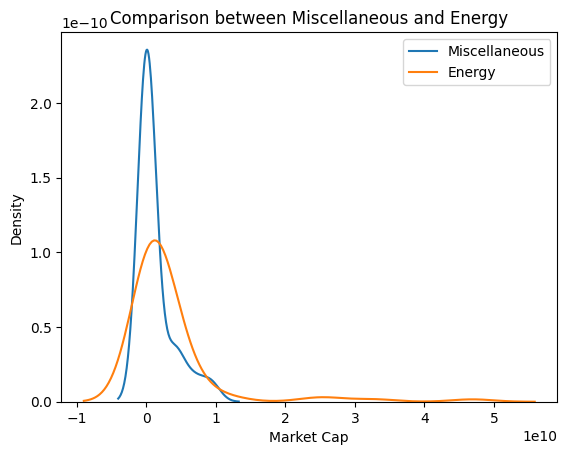

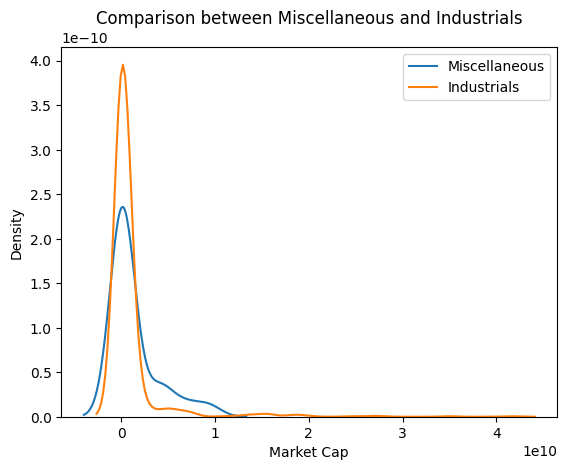

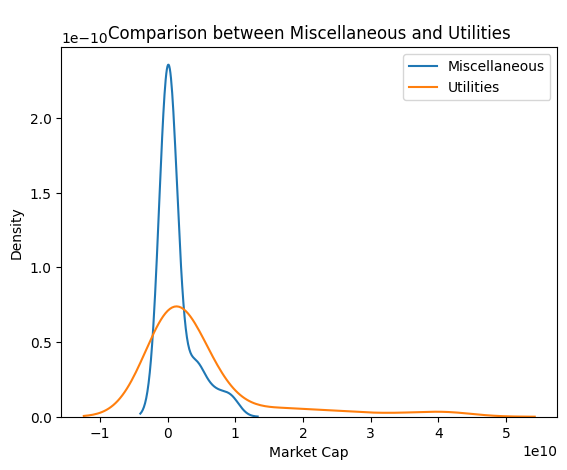

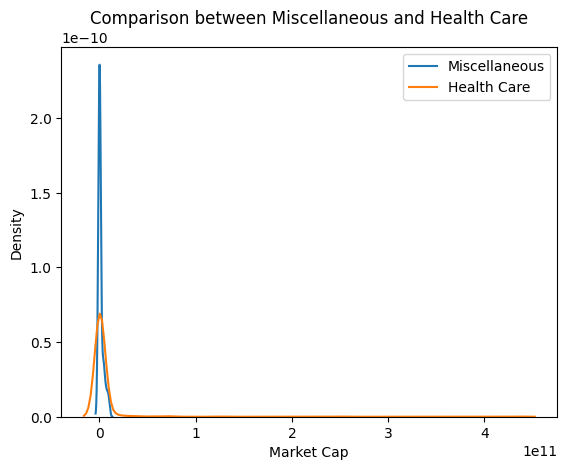

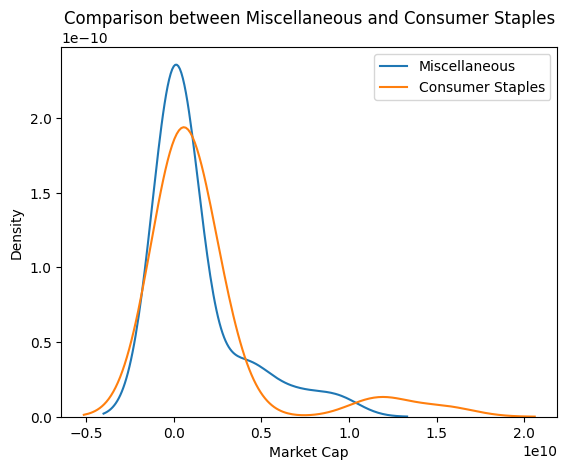

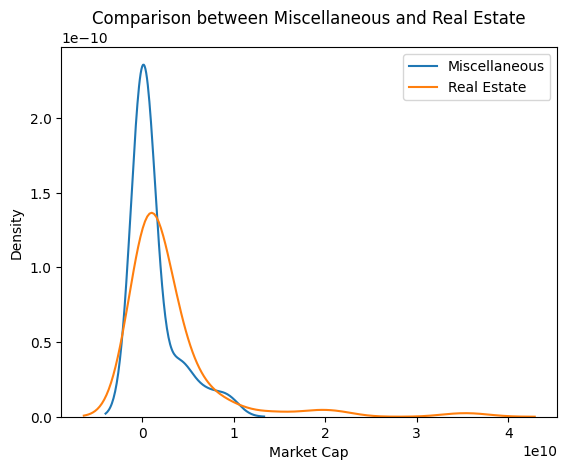

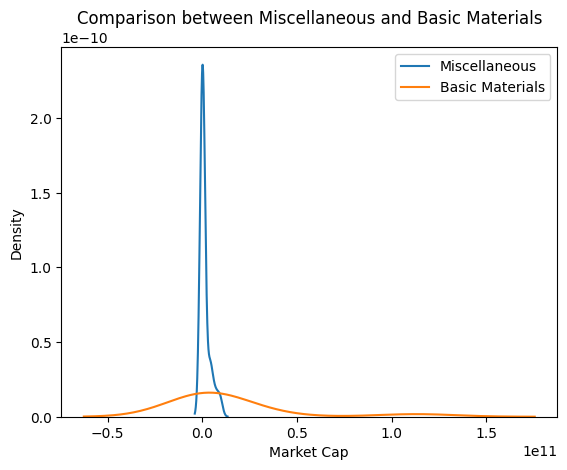

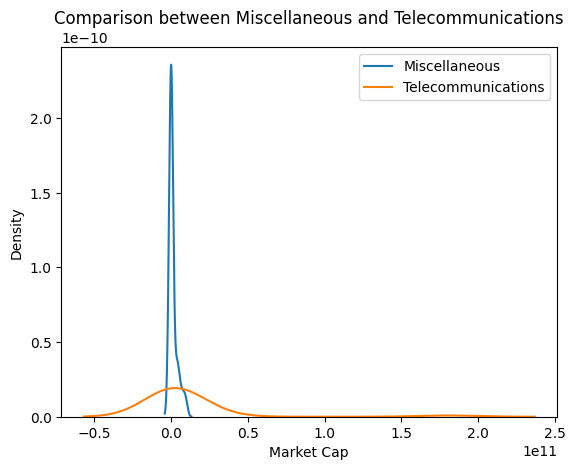

In [43]:
miscellaneous = data[data['Sector'] == 'Miscellaneous']['Market_Cap']

sectors = ['Consumer Discretionary', 'Technology', 'Finance', 'Energy', 'Industrials', 'Utilities', 'Health Care', 'Consumer Staples', 'Real Estate', 'Basic Materials', 'Telecommunications']

for sector in sectors:
    sector_market_cap = data[data['Sector'] == sector]['Market_Cap']

    sns.kdeplot(miscellaneous, label='Miscellaneous')
    sns.kdeplot(sector_market_cap, label=sector)
    plt.xlabel('Market Cap')
    plt.ylabel('Density')
    plt.title(f'Comparison between Miscellaneous and {sector}')
    plt.legend()
    plt.show()

In [44]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

In [45]:
sectors = ['Consumer Discretionary', 'Technology', 'Finance', 'Energy', 'Industrials', 'Utilities',
           'Health Care', 'Consumer Staples', 'Real Estate', 'Basic Materials', 'Telecommunications']

miscellaneous = 'Miscellaneous'

for i in range(len(sectors)):
    sector1 = sectors[i]

    if sector1 == miscellaneous:
        continue

    market_cap1 = data[data['Sector'] == sector1]['Market_Cap']
    market_cap2 = data[data['Sector'] == miscellaneous]['Market_Cap']
    market_cap3 = data[data['Sector'] == sector1]['Market_Cap']
    market_cap4 = data[data['Sector'] == miscellaneous]['Market_Cap']

    st, p_v = ttest_ind(market_cap1, market_cap2)
    stat, p_value = mannwhitneyu(market_cap3, market_cap4)

    print(f"Cравнение между {miscellaneous} и {sector1}:")
    print(f"Statistic_ttest: {st}")
    print(f"Statistic_mannwhitneyu: {stat}")
    print(f"P-value_ttest: {p_v}")
    print(f"P-value_mannwhitneyu: {p_value}")



Cравнение между Miscellaneous и Consumer Discretionary:
Statistic_ttest: 0.5501437407249681
Statistic_mannwhitneyu: 8369.0
P-value_ttest: 0.5824429202365475
P-value_mannwhitneyu: 0.009365077106638886
Cравнение между Miscellaneous и Technology:
Statistic_ttest: 0.5082039894308162
Statistic_mannwhitneyu: 7503.0
P-value_ttest: 0.6115442484481659
P-value_mannwhitneyu: 0.0023544717473920835
Cравнение между Miscellaneous и Finance:
Statistic_ttest: 0.2238963817842822
Statistic_mannwhitneyu: 11772.0
P-value_ttest: 0.8228893733644259
P-value_mannwhitneyu: 0.26973151368933834
Cравнение между Miscellaneous и Energy:
Statistic_ttest: 1.3591216748757906
Statistic_mannwhitneyu: 1430.0
P-value_ttest: 0.17699272825194362
P-value_mannwhitneyu: 0.001836832145116501
Cравнение между Miscellaneous и Industrials:
Statistic_ttest: -0.5264192430242458
Statistic_mannwhitneyu: 8071.5
P-value_ttest: 0.5987342791000718
P-value_mannwhitneyu: 0.1000048835038348
Cравнение между Miscellaneous и Utilities:
Statistic_

Сравнение показало, что выборка рыночной стоимости сектора Miscellaneous не имеет статистически значимых различий с выборками Finance, Industrials, Utilities, Health Care, Consumer Staples, Basic Materials, Telecommunications так как, Pvalue > 0.05. Сравнение с остальными выборками показало что различия средних значений распределений все таки есть.

**5. Провести анализ курса акций компании за все время с момента выхода на рынок.**

загрузить курс акций своей компании с момента выхода на IPO.  Построить график, сделать скользящую среднюю, скользящую сумму, скользящий variants, посмотреть валатильность, аномальные изменения, оценить тренд акции, скользящие окна.

In [53]:
!pip install yfinance
import yfinance as yf
ticker = "AFACW"
data_yf = yf.download(ticker, start="2021-12-31", end="2023-10-01")
data_yf

[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AFACW']: Exception('%ticker%: No timezone found, symbol may be delisted')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


Для компании которая выпала по рандомайзеру AFACW в строке 2733 , нет данных в yfinance. Решил провести дальнейший анализ для компании CET в строке 3

[*********************100%%**********************]  1 of 1 completed


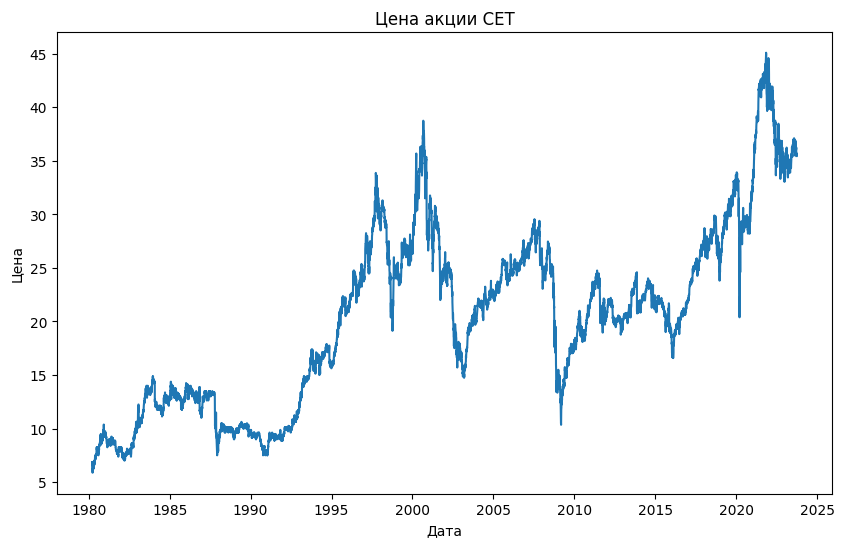

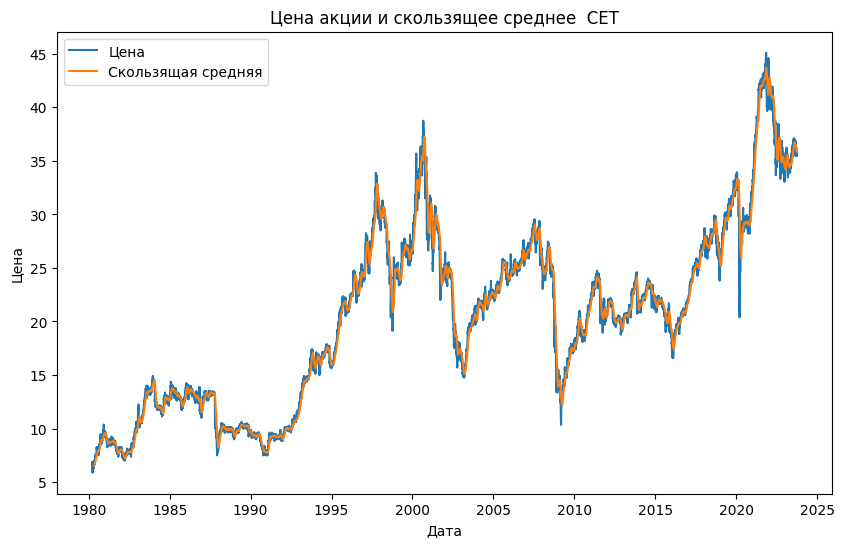

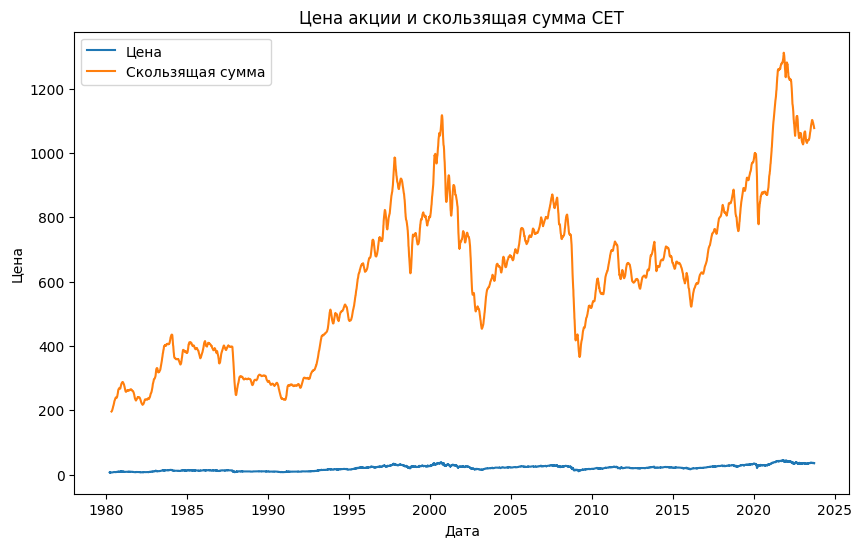

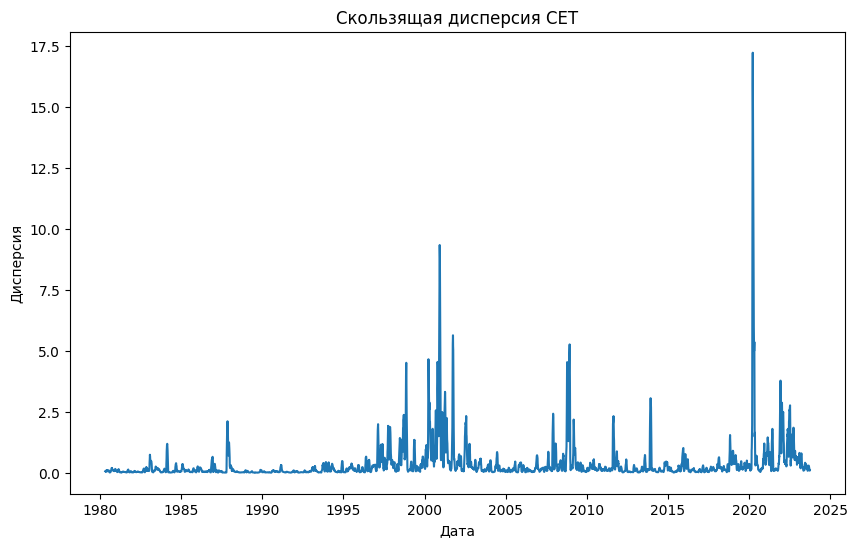

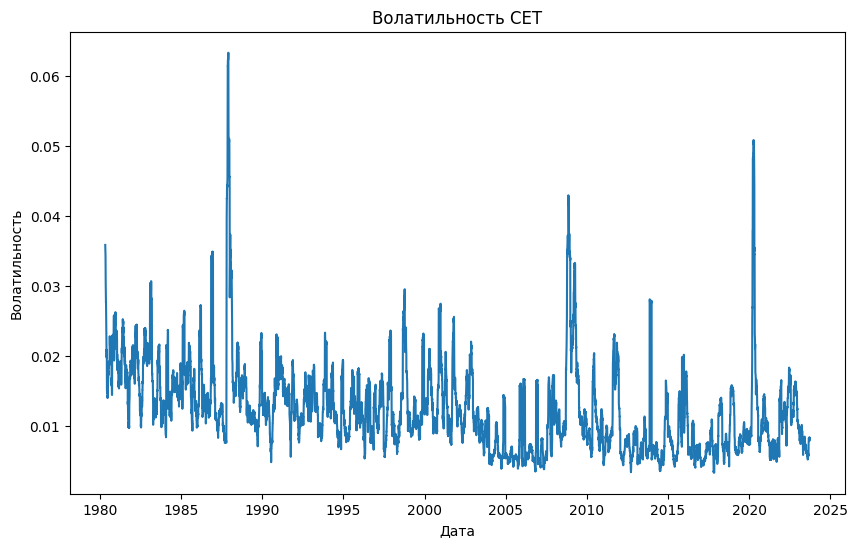

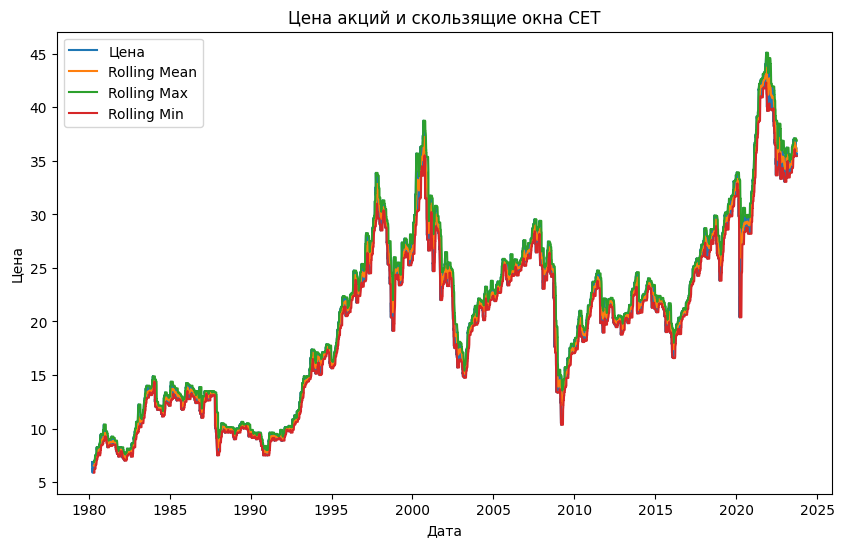

In [59]:
!pip install yfinance
import yfinance as yf
# Получение исторических данных о курсе акций компании CET
ticker = "CET"
data_yf = yf.download(ticker, start="1951-12-31", end="2023-10-01")

# Построение графика курса акций
plt.figure(figsize=(10, 6))
plt.plot(data_yf['Close'])
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.title(f"Цена акции {ticker}")
plt.show()

# Расчет скользящей средней
data_yf['MA'] = data_yf['Close'].rolling(window=30).mean()

# Построение графика скользящей средней
plt.figure(figsize=(10, 6))
plt.plot(data_yf['Close'], label='Цена')
plt.plot(data_yf['MA'], label='Скользящая средняя')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.title(f"Цена акции и скользящее среднее  {ticker}")
plt.legend()
plt.show()

# Расчет скользящей суммы
data_yf['Sum'] = data_yf['Close'].rolling(window=30).sum()

# Построение графика скользящей суммы
plt.figure(figsize=(10, 6))
plt.plot(data_yf['Close'], label='Цена')
plt.plot(data_yf['Sum'], label='Скользящая сумма')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.title(f"Цена акции и скользящая сумма {ticker}")
plt.legend()
plt.show()

# Расчет скользящей дисперсии
data_yf['Var'] = data_yf['Close'].rolling(window=30).var()

# Построение графика скользящей дисперсии
plt.figure(figsize=(10, 6))
plt.plot(data_yf['Var'])
plt.xlabel('Дата')
plt.ylabel('Дисперсия')
plt.title(f"Скользящая дисперсия {ticker}")
plt.show()

# Расчет волатильности
data_yf['Volatility'] = data_yf['Close'].pct_change().rolling(window=30).std()

# Построение графика волатильности
plt.figure(figsize=(10, 6))
plt.plot(data_yf['Volatility'])
plt.xlabel('Дата')
plt.ylabel('Волатильность')
plt.title(f"Волатильность {ticker}")
plt.show()

# Определение аномальных изменений
#data_yf['Returns'] = data_yf['Close'].pct_change()
#threshold = 2.0 # Пороговое значение для определения аномалий
#data_yf['Anomaly'] = abs(data_yf['Returns']) > threshold

# Построение графика аномальных изменений
#plt.figure(figsize=(10, 6))
#plt.plot(data_yf['Close'], label='Цена')
#plt.scatter(data_yf[data_yf['Anomaly']]['Close'].index, data_yf[data_yf['Anomaly']]['Close'], color='r', label='Anomaly')
#plt.xlabel('Дата')
#plt.ylabel('Цена')
#plt.title(f"Цена акций и аномалии {ticker}")
#plt.legend()
#plt.show()

# Оценка тренда акции
#data_yf['Trend'] = data_yf['Close'].diff()
#data_yf['Trend'] = data_yf['Trend'].apply(lambda x: 1 if x > 0 else -1 if x < 0 else 0)

# Построение графика тренда акции
#plt.figure(figsize=(10, 6))
#plt.plot(data_yf['Trend'])
#plt.xlabel('Date')
#plt.ylabel('Trend')
#plt.title(f"Trend of {ticker}")
#plt.show()

# Использование скользящих окон
window = data_yf['Close'].rolling(window=30)
data_yf['Rolling Mean'] = window.mean()
data_yf['Rolling Max'] = window.max()
data_yf['Rolling Min'] = window.min()

# Построение графика скользящих окон
plt.figure(figsize=(10, 6))
plt.plot(data_yf['Close'], label='Цена')
plt.plot(data_yf['Rolling Mean'], label='Rolling Mean')
plt.plot(data_yf['Rolling Max'], label='Rolling Max')
plt.plot(data_yf['Rolling Min'], label='Rolling Min')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.title(f"Цена акций и скользящие окна {ticker}")
plt.legend()
plt.show()